In [60]:
import pandas as pd
from matplotlib import pyplot as plt

In [61]:
filename = "D:\\BeCode\\Projects\\immo-eliza-ml\\properties.csv"
df = pd.read_csv(filename)
df.columns

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')

In [62]:
import pandas as pd
import numpy as np

filename = "D:\\BeCode\\Projects\\immo-eliza-ml\\properties.csv"
df = pd.read_csv(filename)

# Remove duplicates
df = df.drop_duplicates()

# Remove white spaces  (leading, trailing, or extra spaces between words)
df = df.apply(lambda x: x.str.strip().str.replace('\s+', ' ', regex=True) if x.dtype == "object" else x)

# fill None when the value is empty
#df = df.fillna('NaN')

# Ensure the 'price' column contains only numeric values, setting non-numeric entries to NaN
if 'price' in df.columns:
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Save the cleaned data to a new CSV file
#cleaned_file_path = 'cleaned_properties.csv'
#df.to_csv(cleaned_file_path, index=False)



In [63]:
df.head()

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


In [64]:
df.dtypes

id                                  int64
price                             float64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int64
latitude                          float64
longitude                         float64
construction_year                 float64
total_area_sqm                    float64
surface_land_sqm                  float64
nbr_frontages                     float64
nbr_bedrooms                      float64
equipped_kitchen                   object
fl_furnished                        int64
fl_open_fire                        int64
fl_terrace                          int64
terrace_sqm                       float64
fl_garden                           int64
garden_sqm                        float64
fl_swimming_pool                    int64
fl_floodzone                      

In [65]:
nan_count = df.isna().sum()
print("Count NaN values of column wise:\n", nan_count)

Count NaN values of column wise:
 id                                    0
price                                 0
property_type                         0
subproperty_type                      0
region                                0
province                              0
locality                              0
zip_code                              0
latitude                          14098
longitude                         14098
construction_year                 33391
total_area_sqm                     7615
surface_land_sqm                  36256
nbr_frontages                     26346
nbr_bedrooms                          0
equipped_kitchen                      0
fl_furnished                          0
fl_open_fire                          0
fl_terrace                            0
terrace_sqm                       13140
fl_garden                             0
garden_sqm                         2939
fl_swimming_pool                      0
fl_floodzone                          0
state_

In [66]:
# List of columns you want to drop
columns_to_drop = ['id', 'nbr_frontages', 'cadastral_income', 'epc', 'surface_land_sqm']

# Drop columns if they exist in the DataFrame
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [67]:
df.dtypes

price                             float64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int64
latitude                          float64
longitude                         float64
construction_year                 float64
total_area_sqm                    float64
nbr_bedrooms                      float64
equipped_kitchen                   object
fl_furnished                        int64
fl_open_fire                        int64
fl_terrace                          int64
terrace_sqm                       float64
fl_garden                           int64
garden_sqm                        float64
fl_swimming_pool                    int64
fl_floodzone                        int64
state_building                     object
primary_energy_consumption_sqm    float64
heating_type                      

In [68]:
df.head()

,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,...,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,heating_type,fl_double_glazing
0,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,1963.0,...,1,5.0,0,0.0,0,0,MISSING,231.0,GAS,1
1,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,NaN,...,0,0.0,0,0.0,0,0,MISSING,221.0,MISSING,1
2,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,NaN,...,1,NaN,0,0.0,0,1,AS_NEW,NaN,GAS,0
3,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,2024.0,...,0,0.0,0,0.0,0,1,MISSING,99.0,MISSING,0
4,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,2022.0,...,1,20.0,1,142.0,0,0,AS_NEW,19.0,GAS,0


In [69]:
cols_with_nans = [x for x in df if df[x].isnull().sum()>0]
df[cols_with_nans].isnull().sum()
print (cols_with_nans)

['latitude', 'longitude', 'construction_year', 'total_area_sqm', 'terrace_sqm', 'garden_sqm', 'primary_energy_consumption_sqm']


In [70]:
selected_columns = ['latitude','longitude','construction_year', 'total_area_sqm', 'terrace_sqm', 'garden_sqm', 'primary_energy_consumption_sqm']
nan_count = df[selected_columns].isna().sum()
print("Count NaN values of particular column:\n", nan_count)


Count NaN values of particular column:
 latitude                          14098
longitude                         14098
construction_year                 33391
total_area_sqm                     7615
terrace_sqm                       13140
garden_sqm                         2939
primary_energy_consumption_sqm    26567
dtype: int64


In [71]:
import pandas as pd
from sklearn.impute import SimpleImputer

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])

# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

# Save the imputed data
imputed_file_path = 'properties_imputed.csv'
df.to_csv(imputed_file_path, index=False)



PermissionError: [Errno 13] Permission denied: 'properties_imputed.csv'

In [ ]:
import pandas as pd

# List the categorical columns you want to encode
categorical_columns = ['property_type', 'subproperty_type','region','province','locality','equipped_kitchen','state_building','heating_type']  # Replace with actual categorical column names

# Apply one-hot encoding to the selected categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the result
print("Data after one-hot encoding:")
print(df_encoded.head())

Data after one-hot encoding:
      price  zip_code  latitude  longitude  construction_year  total_area_sqm  \
0 -0.451165 -1.029659  1.039429   0.049374          -0.817359       -0.152031   
1  0.059835  1.344346  0.905558  -0.574041           0.170540       -0.083586   
2 -0.200227 -1.355731 -0.149791  -0.003601           0.170540       -0.045561   
3  0.178460 -0.954795  1.106446   0.559091           1.126571        0.068514   
4  1.277340 -1.242604  0.036855   0.045563           1.062836        0.022884   

   nbr_bedrooms  fl_furnished  fl_open_fire  fl_terrace  ...  \
0     -0.415630      -0.13839     -0.452424    0.832190  ...   
1     -0.415630      -0.13839     -0.452424   -1.201648  ...   
2      0.112304      -0.13839     -0.452424    0.832190  ...   
3      0.112304      -0.13839     -0.452424   -1.201648  ...   
4     -0.415630      -0.13839     -0.452424    0.832190  ...   

   state_building_TO_BE_DONE_UP  state_building_TO_RENOVATE  \
0                         False     

In [72]:
from sklearn.preprocessing import OneHotEncoder

reaction = df[['property_type','province', 'equipped_kitchen','state_building','heating_type']] # ,'region',,'locality', 'subproperty_type'
# create encoder object
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

# apply fit method to the data frame

new_columns = encoder.fit_transform(reaction)
df = pd.concat([df, new_columns], axis=1).drop(columns=['property_type','province', 'equipped_kitchen','state_building','heating_type'])
df.columns

Index(['price', 'subproperty_type', 'region', 'locality', 'zip_code',
       'latitude', 'longitude', 'construction_year', 'total_area_sqm',
       'nbr_bedrooms', 'fl_furnished', 'fl_open_fire', 'fl_terrace',
       'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_swimming_pool',
       'fl_floodzone', 'primary_energy_consumption_sqm', 'fl_double_glazing',
       'property_type_APARTMENT', 'property_type_HOUSE', 'province_Antwerp',
       'province_Brussels', 'province_East Flanders',
       'province_Flemish Brabant', 'province_Hainaut', 'province_Limburg',
       'province_Liège', 'province_Luxembourg', 'province_MISSING',
       'province_Namur', 'province_Walloon Brabant', 'province_West Flanders',
       'equipped_kitchen_HYPER_EQUIPPED', 'equipped_kitchen_INSTALLED',
       'equipped_kitchen_MISSING', 'equipped_kitchen_NOT_INSTALLED',
       'equipped_kitchen_SEMI_EQUIPPED', 'equipped_kitchen_USA_HYPER_EQUIPPED',
       'equipped_kitchen_USA_INSTALLED', 'equipped_kitchen_USA_SEMI_E

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numeric columns to standardize
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Display the result
print("Data after standardization:")
print(df.head())

Data after standardization:
      price subproperty_type            region  locality  zip_code  latitude  \
0 -0.451165        APARTMENT          Flanders   Antwerp -1.029659  1.039429   
1  0.059835            HOUSE          Flanders      Gent  1.344346  0.905558   
2 -0.200227        APARTMENT  Brussels-Capital  Brussels -1.355731 -0.149791   
3  0.178460            HOUSE          Flanders  Turnhout -0.954795  1.106446   
4  1.277340           DUPLEX          Wallonia  Nivelles -1.242604  0.036855   

   longitude  construction_year  total_area_sqm  nbr_bedrooms  ...  \
0   0.049374          -0.817359       -0.152031     -0.415630  ...   
1  -0.574041           0.170540       -0.083586     -0.415630  ...   
2  -0.003601           0.170540       -0.045561      0.112304  ...   
3   0.559091           1.126571        0.068514      0.112304  ...   
4   0.045563           1.062836        0.022884     -0.415630  ...   

   state_building_TO_RENOVATE  state_building_TO_RESTORE  heating_type

In [ ]:
df.head()

,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,...,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,heating_type,fl_double_glazing
0,-0.451165,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,-1.029659,1.039429,0.049374,-0.817359,...,0.832190,-0.133736,-0.528432,-0.081622,-0.137992,-1.091859,MISSING,-0.007415,GAS,0.691103
1,0.059835,HOUSE,HOUSE,Flanders,East Flanders,Gent,1.344346,0.905558,-0.574041,0.170540,...,-1.201648,-0.274903,-0.528432,-0.081622,-0.137992,-1.091859,MISSING,-0.007493,MISSING,0.691103
2,-0.200227,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,-1.355731,-0.149791,-0.003601,0.170540,...,0.832190,-0.246670,-0.528432,-0.081622,-0.137992,0.915869,AS_NEW,-0.007329,GAS,-1.446962
3,0.178460,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,-0.954795,1.106446,0.559091,1.126571,...,-1.201648,-0.274903,-0.528432,-0.081622,-0.137992,0.915869,MISSING,-0.008446,MISSING,-1.446962
4,1.277340,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,-1.242604,0.036855,0.045563,1.062836,...,0.832190,0.289767,1.892391,0.022664,-0.137992,-1.091859,AS_NEW,-0.009072,GAS,-1.446962


In [ ]:
import pandas as pd
import numpy as np

# Define X and y as numpy arrays
X = df['property_type']
y = df['price'].values  # Target: 1D array

# Confirm that X and y are of type numpy.ndarray
print(f"Type of X: {type(X)}")
print(f"Type of y: {type(y)}")

Type of X: <class 'pandas.core.series.Series'>
Type of y: <class 'numpy.ndarray'>


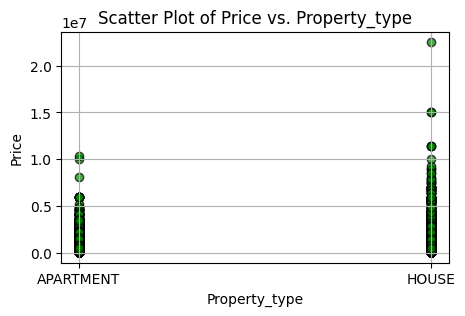

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(5,3))
plt.scatter(X, y, color='green', edgecolor='k', alpha=0.7)

# Add labels and a title
plt.title('Scatter Plot of Price vs. Property_type')
plt.xlabel('Property_type')
plt.ylabel('Price')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60408,)
X_test shape: (15103,)
y_train shape: (60408,)
y_test shape: (15103,)
